In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
df = pd.read_csv("./Data/Road.csv")
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [210]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [211]:
print("No of Rows :",df.shape[0])
print("No of Features :",df.shape[-1])

No of Rows : 12316
No of Features : 32


In [212]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

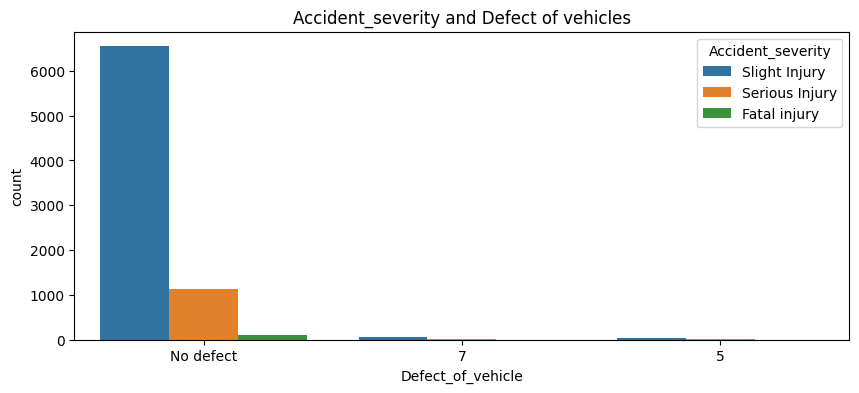

In [213]:
plt.figure(figsize=(10,4))
sns.countplot(x='Defect_of_vehicle',hue='Accident_severity',data=df)
plt.title('Accident_severity and Defect of vehicles')
plt.show()

In [214]:
df.drop('Defect_of_vehicle',axis=1,inplace=True) 

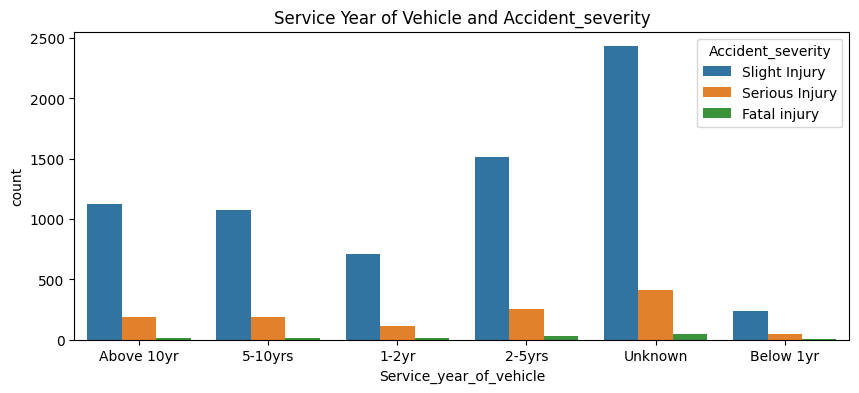

In [215]:
plt.figure(figsize=(10,4))
sns.countplot(x='Service_year_of_vehicle',hue='Accident_severity',data=df)
plt.title('Service Year of Vehicle and Accident_severity')
plt.show()

In [216]:
df['Service_year_of_vehicle']=df['Service_year_of_vehicle'].fillna(df['Service_year_of_vehicle'].mode()[0])

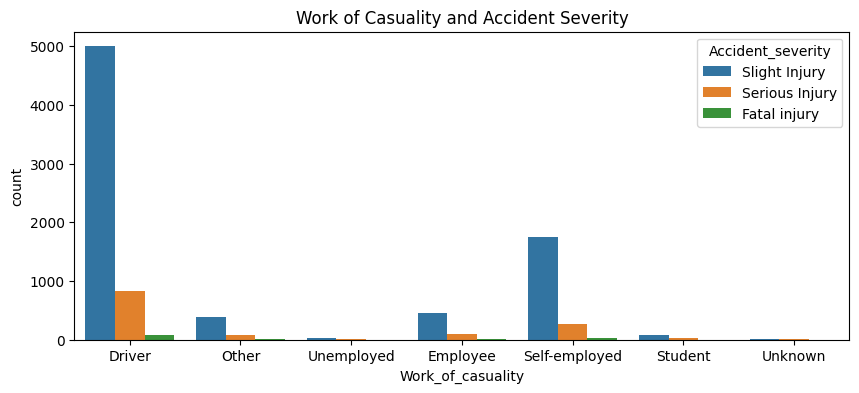

In [217]:
plt.figure(figsize=(10,4))
sns.countplot(x='Work_of_casuality',hue='Accident_severity',data=df)
plt.title("Work of Casuality and Accident Severity")
plt.show()

In [218]:
df['Work_of_casuality'].fillna('Unknown',inplace=True)

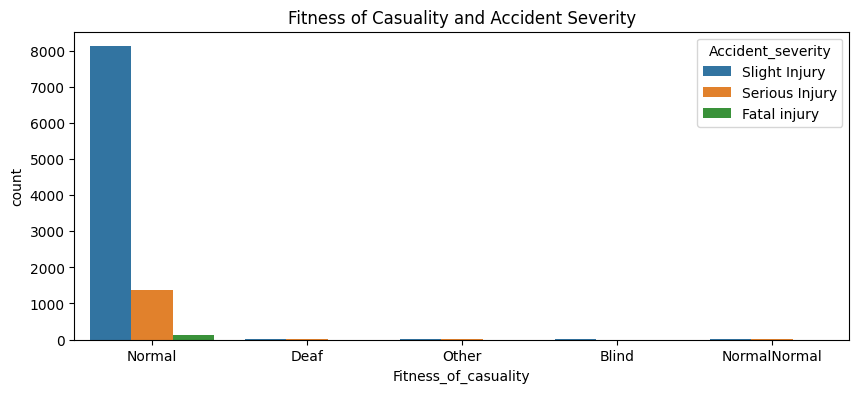

In [219]:
plt.figure(figsize=(10,4))
sns.countplot(x='Fitness_of_casuality',hue='Accident_severity',data=df)
plt.title("Fitness of Casuality and Accident Severity")
plt.show()

In [220]:
df.drop('Fitness_of_casuality',axis=1,inplace=True)

In [221]:
df.dropna(inplace=True)

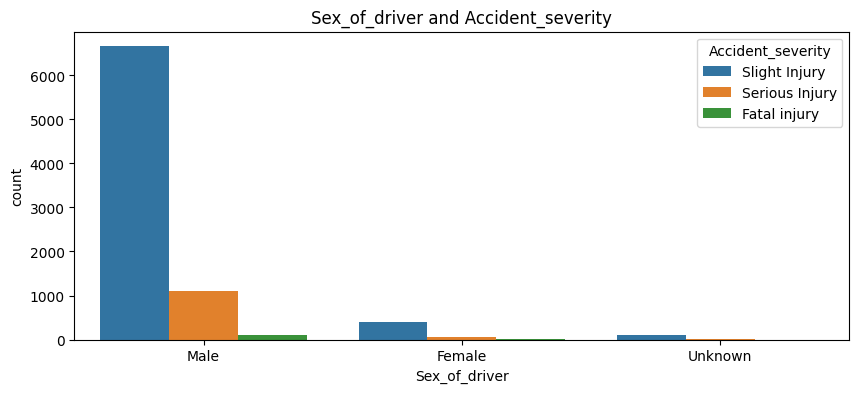

In [222]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Sex_of_driver', hue='Accident_severity', data=df)
plt.title('Sex_of_driver and Accident_severity')
plt.show()

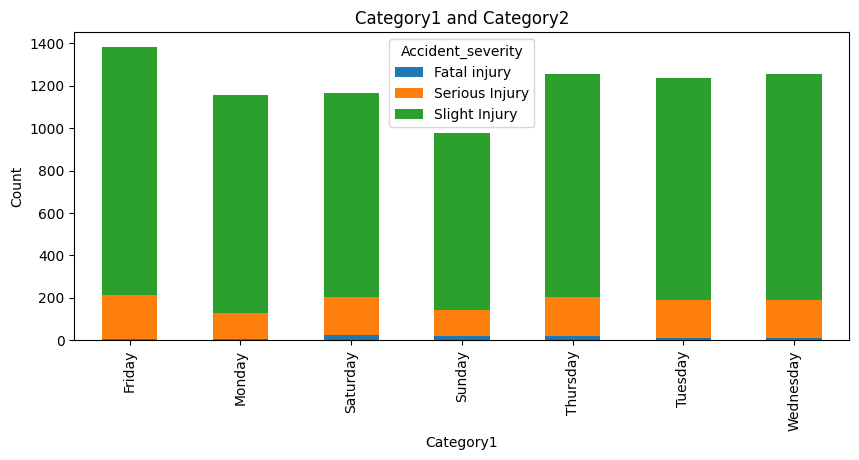

In [223]:
cross_tab = pd.crosstab(df['Day_of_week'], df['Accident_severity'])
cross_tab.plot(kind='bar',stacked=True, figsize=(10, 4))
plt.title('Category1 and Category2')
plt.xlabel('Category1')
plt.ylabel('Count')
plt.show()

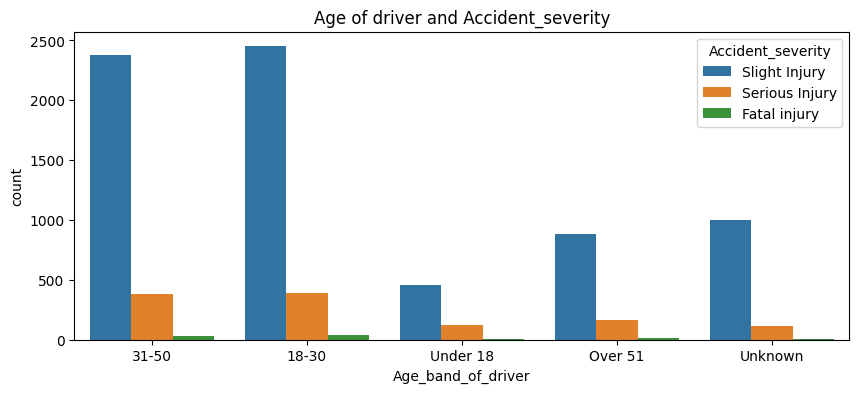

In [224]:
plt.figure(figsize=(10,4))
sns.countplot(x='Age_band_of_driver',hue='Accident_severity',data=df)
plt.title('Age of driver and Accident_severity')
plt.show()

C:\Users\koush\AppData\Local\Temp\ipykernel_9108\3850231745.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Accident_severity',data=df,palette=custom_palette)


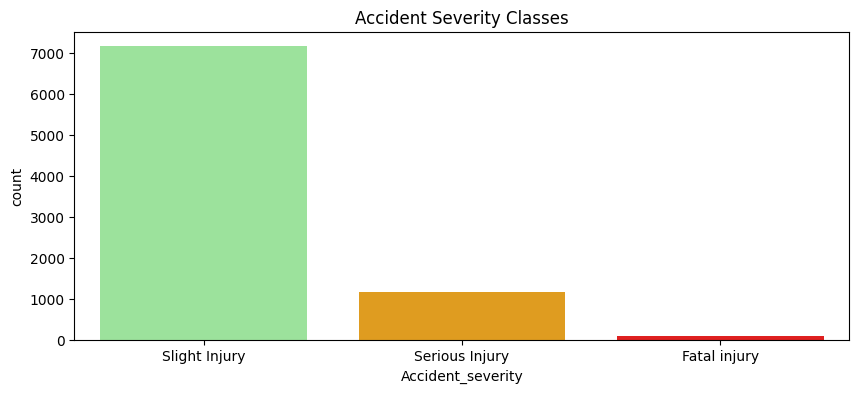

In [225]:
plt.figure(figsize=(10,4))
custom_palette = {'Serious Injury': 'orange', 'Fatal injury': 'red', 'Slight Injury': 'lightgreen'}
sns.countplot(x='Accident_severity',data=df,palette=custom_palette)
plt.title('Accident Severity Classes')
plt.show()

In [226]:
[x for x in df['Time'].unique()]

['17:02:00',
 '1:06:00',
 '17:20:00',
 '14:40:00',
 '17:45:00',
 '22:45:00',
 '8:20:00',
 '15:10:00',
 '12:11:00',
 '18:36:00',
 '14:35:00',
 '15:30:00',
 '18:10:00',
 '15:25:00',
 '13:57:00',
 '20:30:00',
 '16:30:00',
 '21:50:00',
 '9:12:00',
 '10:36:00',
 '18:19:00',
 '19:12:00',
 '11:38:00',
 '13:30:00',
 '12:39:00',
 '12:30:00',
 '16:55:00',
 '18:25:00',
 '13:45:00',
 '18:45:00',
 '11:02:00',
 '15:55:00',
 '20:00:00',
 '18:48:00',
 '23:25:00',
 '7:40:00',
 '15:17:00',
 '15:50:00',
 '9:45:00',
 '17:35:00',
 '20:50:00',
 '21:32:00',
 '23:36:00',
 '17:54:00',
 '17:00:00',
 '1:15:00',
 '18:30:00',
 '15:52:00',
 '12:33:00',
 '8:59:00',
 '17:25:00',
 '0:53:00',
 '15:20:00',
 '18:23:00',
 '5:24:00',
 '12:15:00',
 '22:15:00',
 '6:35:00',
 '17:34:00',
 '4:00:00',
 '8:50:00',
 '0:25:00',
 '0:10:00',
 '1:05:00',
 '19:40:00',
 '19:08:00',
 '17:50:00',
 '21:30:00',
 '14:49:00',
 '17:40:00',
 '21:55:00',
 '7:30:00',
 '10:41:00',
 '13:16:00',
 '11:30:00',
 '16:20:00',
 '20:40:00',
 '17:11:00',
 '

In [227]:
time_series=pd.to_datetime(df['Time'],format="%H:%M:%S")

In [228]:
time_series.head()

1   1900-01-01 17:02:00
3   1900-01-01 01:06:00
7   1900-01-01 17:20:00
8   1900-01-01 17:20:00
9   1900-01-01 17:20:00
Name: Time, dtype: datetime64[ns]

In [229]:
rounded_times=time_series.dt.round('30min')
rounded_times_str = rounded_times.dt.strftime('%H:%M:%S')

In [230]:
pd.DataFrame({'Time':df['Time'],'Latest time':rounded_times_str})
df.drop('Time',axis=1,inplace=True)

In [231]:
df=pd.concat([rounded_times_str,df],axis=1)

In [232]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
1,17:00:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,2,Going straight,na,na,na,na,Unknown,Not a Pedestrian,Overtaking,Slight Injury
3,01:00:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,2,Going straight,Pedestrian,Female,18-30,3,Driver,Not a Pedestrian,Changing lane to the right,Slight Injury
7,17:30:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Above 10yr,...,1,U-Turn,na,na,na,na,Unknown,Not a Pedestrian,No priority to vehicle,Slight Injury
8,17:30:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,1,Going straight,Pedestrian,Male,Under 18,3,Driver,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:30:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,1,U-Turn,Passenger,Male,18-30,3,Driver,Not a Pedestrian,Moving Backward,Serious Injury


In [233]:
u = 1
for i in df.isnull().sum():
    if i == 0:continue
    else:
        print("null value present")
        u = 0
if u == 1:print("No null values")

No null values


In [234]:
(df['Accident_severity'].value_counts()/8439)*100

Slight Injury     84.950824
Serious Injury    13.876052
Fatal injury       1.173125
Name: Accident_severity, dtype: float64

In [235]:
from sklearn.preprocessing import OneHotEncoder

In [236]:
categorical_columns=df.select_dtypes('object')
encoder=OneHotEncoder(sparse=False,drop='first')
categorical_columns.drop('Accident_severity',axis=1,inplace=True)
encoded_data=encoder.fit_transform(categorical_columns)
encoded_data=pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out())

In [237]:
numerical_columns=['Number_of_vehicles_involved','Number_of_casualties','Accident_severity']
numerical_columns

['Number_of_vehicles_involved', 'Number_of_casualties', 'Accident_severity']

In [238]:
combined_data=pd.concat([encoded_data,df[numerical_columns]],axis=1)
combined_data.tail()

,Time_00:30:00,Time_01:00:00,Time_01:30:00,Time_02:00:00,Time_02:30:00,Time_03:00:00,Time_03:30:00,Time_04:00:00,Time_04:30:00,Time_05:00:00,...,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown,Number_of_vehicles_involved,Number_of_casualties,Accident_severity
12309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,Slight Injury
12312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,Slight Injury
12313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,Serious Injury
12314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,Slight Injury
12315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,Slight Injury


In [239]:
combined_data.dropna(inplace=True)

In [240]:
combined_data.isnull().sum()

Time_00:30:00                  0
Time_01:00:00                  0
Time_01:30:00                  0
Time_02:00:00                  0
Time_02:30:00                  0
                              ..
Cause_of_accident_Turnover     0
Cause_of_accident_Unknown      0
Number_of_vehicles_involved    0
Number_of_casualties           0
Accident_severity              0
Length: 219, dtype: int64

In [241]:
combined_data.shape

(6274, 219)

In [242]:
combined_data.to_csv('./Preprocessed Data/data.csv', index=False)